In [63]:
import nsfg
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
pd.set_option('display.max_rows', None)

In [2]:
df = nsfg.ReadFemPreg()

In [10]:
df.shape

(13593, 244)

In [11]:
df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [12]:
pregordr = df['pregordr']

In [13]:
type(pregordr)

pandas.core.series.Series

In [14]:
print(pregordr)

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64


In [22]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

In [47]:
df.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

In [52]:
import thinkstats2
from collections import Counter

In [50]:
hist = thinkstats2.Hist([1,2,2,3,5])

In [51]:
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [53]:
hist2 = Counter([1,2,2,3,5])

In [54]:
hist2

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [55]:
hist.Freq(2)

2

In [56]:
hist[2]

2

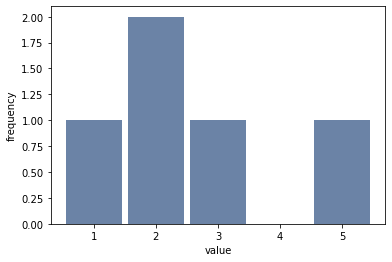

<Figure size 576x432 with 0 Axes>

In [70]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [147]:
preg=nsfg.ReadFemPreg()
live=preg[preg.outcome==1]

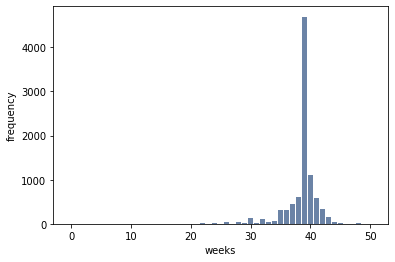

<Figure size 576x432 with 0 Axes>

In [148]:
hist=thinkstats2.Hist(live.prglngth)
thinkplot.Hist(hist)
thinkplot.Show(xlabel='weeks', ylabel='frequency')

In [149]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [150]:
for weeks, freq in sorted(hist.Largest(10)):
    print(weeks, freq)

40 1116
41 587
42 328
43 148
44 46
45 10
46 1
47 1
48 7
50 2


In [245]:
firsts=live[live.birthord ==1]
others=live[live.birthord!=1]
len(live)

9148

In [168]:
first_hist=thinkstats2.Hist(firsts.prglngth)
other_hist=thinkstats2.Hist(others.prglngth)

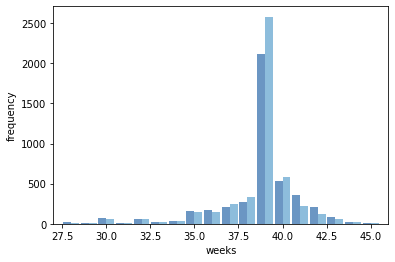

<Figure size 576x432 with 0 Axes>

In [169]:
width=0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27,46])

In [173]:
firsts.prglngth.mean()

38.60095173351461

In [174]:
others.prglngth.mean()

38.52291446673706

In [180]:
# diff in weeks
firsts.prglngth.mean()-others.prglngth.mean()

0.07803726677754952

In [179]:
# diff size in Cohen's d
thinkstats2.CohenEffectSize(firsts.prglngth,others.prglngth)

0.028879044654449883

In [176]:
firsts['totalwgt_lb'].mean()

7.201094430437772

In [177]:
others['totalwgt_lb'].mean()

7.325855614973262

In [182]:
# diff in oz
(firsts['totalwgt_lb'].mean()-others['totalwgt_lb'].mean())*16

-1.9961789525678455

In [178]:
# diff size in Cohen's d
thinkstats2.CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)

-0.088672927072602

In [208]:
mean_diff = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
mean_diff_oz = mean_diff*16
mean_diff_oz

-1.9961789525678455

In [200]:
n1 = len(firsts)
n2 = len(others)
n_pooled = n1 + n2
pooled_var = (firsts.totalwgt_lb.var()*n1+
              others.totalwgt_lb.var()*n2
             )/(n_pooled)
pooled_std = thinkstats2.math.sqrt(pooled_var)
pooled_std

1.4069816871314134

In [202]:
prglngth_CohenD = mean_diff/pooled_std
prglngth_CohenD

-0.088672927072602

In [247]:
!python chap02soln.py

Mean
First babies 7.201094430437772
Others 7.325855614973262
Variance
First babies 2.0180273009157768
Others 1.9437810258964572
Difference in lbs -0.12476118453549034
Difference in oz -1.9961789525678455
Difference relative to mean (%age points) -1.7171423678372415
Cohen d -0.088672927072602
Mode of preg length 39
39 4693
40 1116
38 607
41 587
37 455
chap02soln.py: All tests passed.


In [253]:
firsts_mean_wgt = firsts['totalwgt_lb'].mean()
others_mean_wgt = others['totalwgt_lb'].mean()
wgt_diff = firsts_mean_wgt - others_mean_wgt
wgt_diff*16

-1.9961789525678455

In [250]:
firsts_mean_wgt

7.201094430437772

In [251]:
others_mean_wgt

7.325855614973262

In [263]:
n1 = len(firsts)
n2 = len(others)
var1 = firsts.totalwgt_lb.var()
var2 = others.totalwgt_lb.var()
var_pooled = (var1*n1+var2*n2)/(n1+n2)
std_pooled = thinkstats2.math.sqrt(var_pooled)
wgt_diff/std_pooled

-0.088672927072602